# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [3]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df.head()

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1


In [4]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [5]:
rate_marriage.head()

,2.0,3.0,4.0,5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [6]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [7]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [8]:
religious.columns = ['re1','rel2','rel3']
religious.head()

,re1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [9]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


Building an SVC using a Linear Kernel and Default C-Parameter: 

In [10]:
from sklearn.model_selection import train_test_split

X = df[['age', 'yrs_married', 'children', 'rate1', 'rate2', 'rate3', 'rate4', 're1', 'rel2', 'rel3']].values
Y = df['had_affair'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

Accuracy: 0.7362637362637363
Confusion Matrix: [[773 112]
 [224 165]]


Building an SVC using a Linear Kernel and Small C-Parameter: 

In [12]:
model = svm.SVC(kernel='linear', C=2**-5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

Accuracy: 0.7362637362637363
Confusion Matrix: [[773 112]
 [224 165]]


Building an SVC using a Linear Kernel and Large C-Parameter: 

In [13]:
model = svm.SVC(kernel='linear', C=2**5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

Accuracy: 0.7362637362637363
Confusion Matrix: [[773 112]
 [224 165]]


Using RBF as Kernel and Gamma Value of 2**-5

In [14]:
model = svm.SVC(kernel='rbf', gamma=2**-5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       885
           1       0.64      0.34      0.45       389

    accuracy                           0.74      1274
   macro avg       0.70      0.63      0.64      1274
weighted avg       0.72      0.74      0.71      1274

Accuracy: 0.7394034536891679
Confusion Matrix: [[808  77]
 [255 134]]


Using RBF as Kernel and Gamma Value of 0.1

In [15]:
model = svm.SVC(kernel='rbf', gamma=0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       885
           1       0.62      0.34      0.44       389

    accuracy                           0.74      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

Accuracy: 0.7354788069073783
Confusion Matrix: [[806  79]
 [258 131]]


Using RBF as Kernel and Gamma Value of 1

In [16]:
model = svm.SVC(kernel='rbf', gamma=1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       885
           1       0.53      0.34      0.42       389

    accuracy                           0.71      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.68      0.71      0.69      1274

Accuracy: 0.707221350078493
Confusion Matrix: [[767 118]
 [255 134]]


Using RBF as Kernel and Gamma Value of 2

In [17]:
model = svm.SVC(kernel='rbf', gamma=2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       885
           1       0.54      0.32      0.41       389

    accuracy                           0.71      1274
   macro avg       0.65      0.60      0.61      1274
weighted avg       0.69      0.71      0.69      1274

Accuracy: 0.7103610675039247
Confusion Matrix: [[779 106]
 [263 126]]


Based on the above models, the best kernel to use is RBF, the best gamma value to use is ``2**-5`` and changing the c-parameter in this case seemed to have no effect on the total accuracy of the model. By creating a model with the RBF kernel and a gamma value of ``2**-5``, we received the highest overall accuracy (0.7394034536891679) when compared to every other model. The f1 score for the 0 case (correctly predicting no affair) is around 0.83 (the highest out of all the other models), and 0.45 for the case of correctly predicting an affair (higher than some models, lower than others). Essentially, using an RBF kernel with a ``2**-5`` gamma value maximizes the accuracy and f1 score without sacrificing too much in terms of other metrics. 

Using an RBF kernel allows the decision binary to be rounded out, instead of a linear kernel which makes the decision binary between classes a straight line. This allows the predictions to be more accurate as a result.

Using a large gamma value in general seems to be worse than a lower gamma value - once we reached above 1 for gamma the accuracy plummeted to around 0.71, which is poor compared to the other models. This makes sense, since a small gamma value means that there is less complexity, while a large gamma value has the potential to make the decision binary almost circled around each individual data point, which is bad for correct predicitons.

Changing the c-parameter seems to have made no difference in the model performance metrics. No matter what the value was set to, the performance metrics were always the same. In theory, a small c-parameter should allow for more misclassification of data points (soft margin that prioritizes simplicity), while a high c-parameter allows for little to no misclassification of data points (hard margin that prioritizes accuracy). However, it is possible that the c-parameter doesn't change anything depending on the dataset (if the data points can be clearly separated into two groups with no ambiguity, for example). The hyperplane is likely shifting as we change the c-parameter, it just doesn't change the classification of any of the data points.

### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


Building a Decision Tree Classifier with Default Parameters:

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       885
           1       0.55      0.34      0.42       389

    accuracy                           0.71      1274
   macro avg       0.65      0.61      0.61      1274
weighted avg       0.69      0.71      0.69      1274

Accuracy: 0.7135007849293563
Confusion Matrix: [[777 108]
 [257 132]]


Building a Decision Tree Classifier with a Max Depth of 2 and a Gini Criterion

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, criterion="gini")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

Accuracy: 0.7362637362637363
Confusion Matrix: [[773 112]
 [224 165]]


Building a Decision Tree Classifier with a Max Depth of 2 and an Entropy Criterion

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, criterion="entropy")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

Accuracy: 0.7362637362637363
Confusion Matrix: [[773 112]
 [224 165]]


Building a Decision Tree Classifier with a Max Depth of 3 and a Gini Criterion

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, criterion="gini")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

Accuracy: 0.7401883830455259
Confusion Matrix: [[818  67]
 [264 125]]


Building a Decision Tree Classifier with a Max Depth of 3 and an Entropy Criterion

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

Accuracy: 0.7401883830455259
Confusion Matrix: [[818  67]
 [264 125]]


Building a Decision Tree Classifier with a Max Depth of 4 and a Gini Criterion

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, criterion="gini")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.30      0.41       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.72      0.74      0.70      1274

Accuracy: 0.7386185243328101
Confusion Matrix: [[825  60]
 [273 116]]


Building a Decision Tree Classifier with a Max Depth of 4 and an Entropy Criterion

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.30      0.41       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.72      0.74      0.70      1274

Accuracy: 0.7386185243328101
Confusion Matrix: [[825  60]
 [273 116]]


Based on the models above, it seems as if criterion has no effect on the performance of the model. At each depth, the accuracy and other performance metrics are identical no matter which criterion is used. It is important to note that gini is the simpler of the two criterion however, so this is probably the better criterion to use in this case since it doesn't change the performance of the model.

However, max depth is a different story. The best max depth value is 3 - it provides the highest accuracy of around 0.74, while also maximizing the number of True Positive and True Negative cases on the confusion matrix. 


Visualizing 3 Trees of Max Depth 2, 3, and 4: 

In [25]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)

model2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2.fit(X_train, Y_train)

model3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

[Text(697.5, 906.0, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(348.75, 543.6, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(174.375, 181.19999999999993, 'gini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(523.125, 181.19999999999993, 'gini = 0.445\nsamples = 1791\nvalue = [1193, 598]'),
 Text(1046.25, 543.6, 'X[1] <= 7.5\ngini = 0.298\nsamples = 2138\nvalue = [1749, 389]'),
 Text(871.875, 181.19999999999993, 'gini = 0.217\nsamples = 1277\nvalue = [1119, 158]'),
 Text(1220.625, 181.19999999999993, 'gini = 0.393\nsamples = 861\nvalue = [630, 231]')]

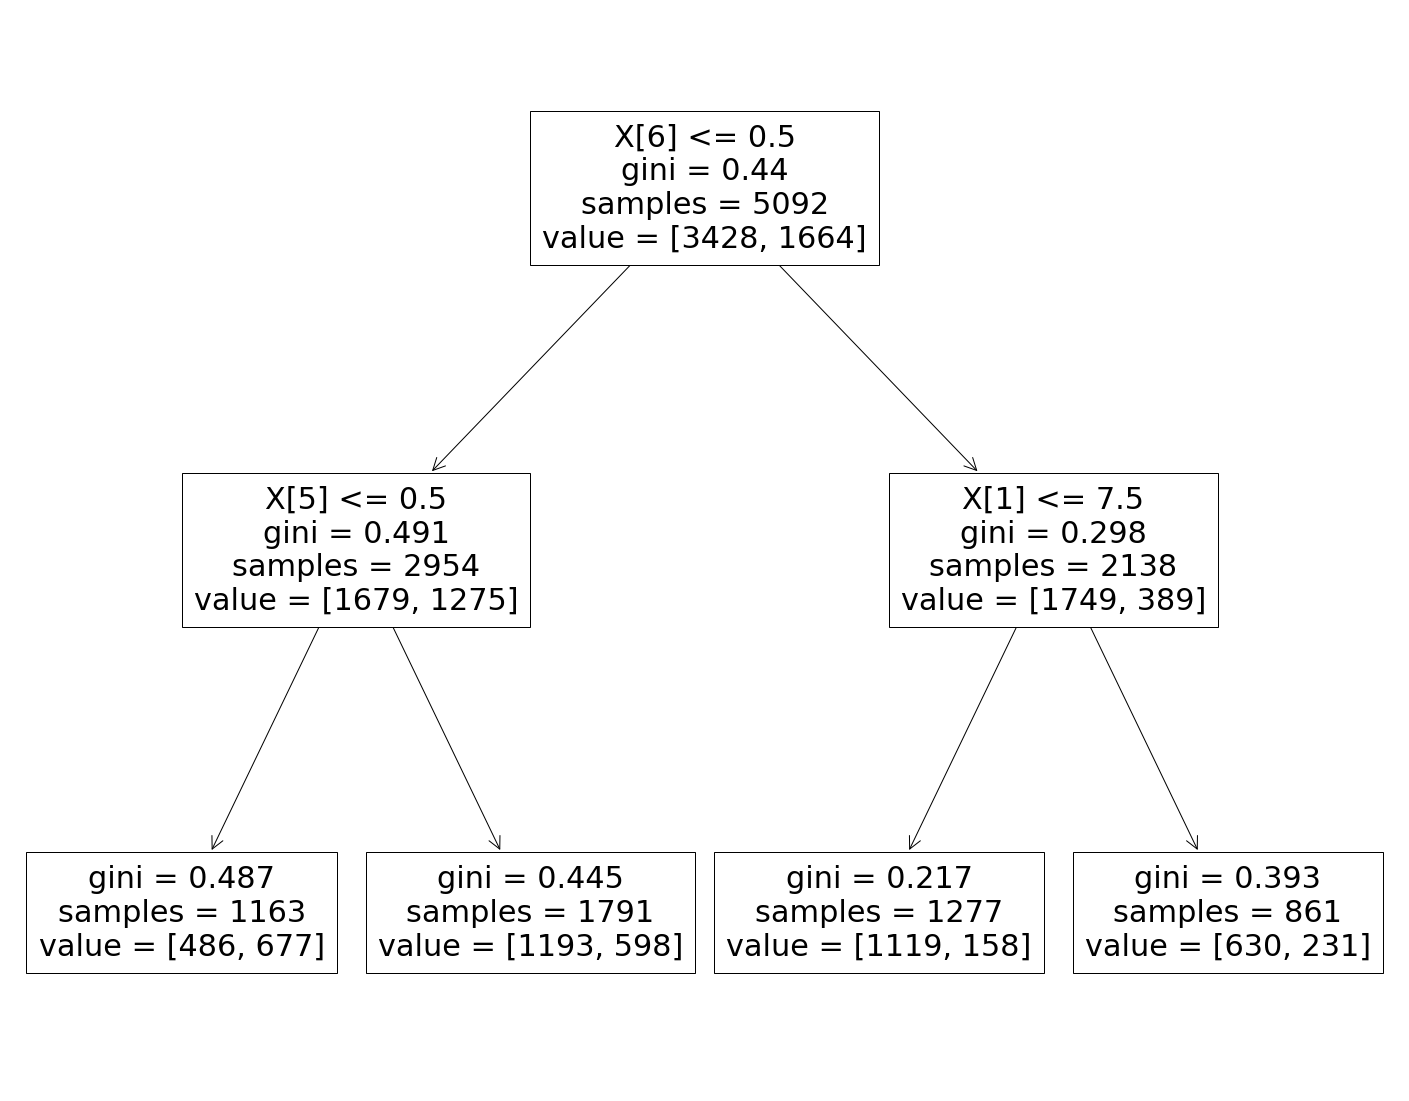

In [26]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model1)

[Text(697.5, 951.3000000000001, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(348.75, 679.5, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(174.375, 407.70000000000005, 'X[1] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(523.125, 407.70000000000005, 'X[1] <= 4.25\ngini = 0.445\nsamples = 1791\nvalue = [1193, 598]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.32\nsamples = 664\nvalue = [531, 133]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.485\nsamples = 1127\nvalue = [662, 465]'),
 Text(1046.25, 679.5, 'X[1] <= 7.5\ngini = 0.298\nsamples = 2138\nvalue = [1749, 389]'),
 Text(871.875, 407.70000000000005, 'X[1] <= 1.5\ngini = 0.217\nsamples = 1277\nvalue = [1119, 158]'),
 Text(784.6875, 135.89999999999998, 'gini = 0.0\nsamples = 175\nv

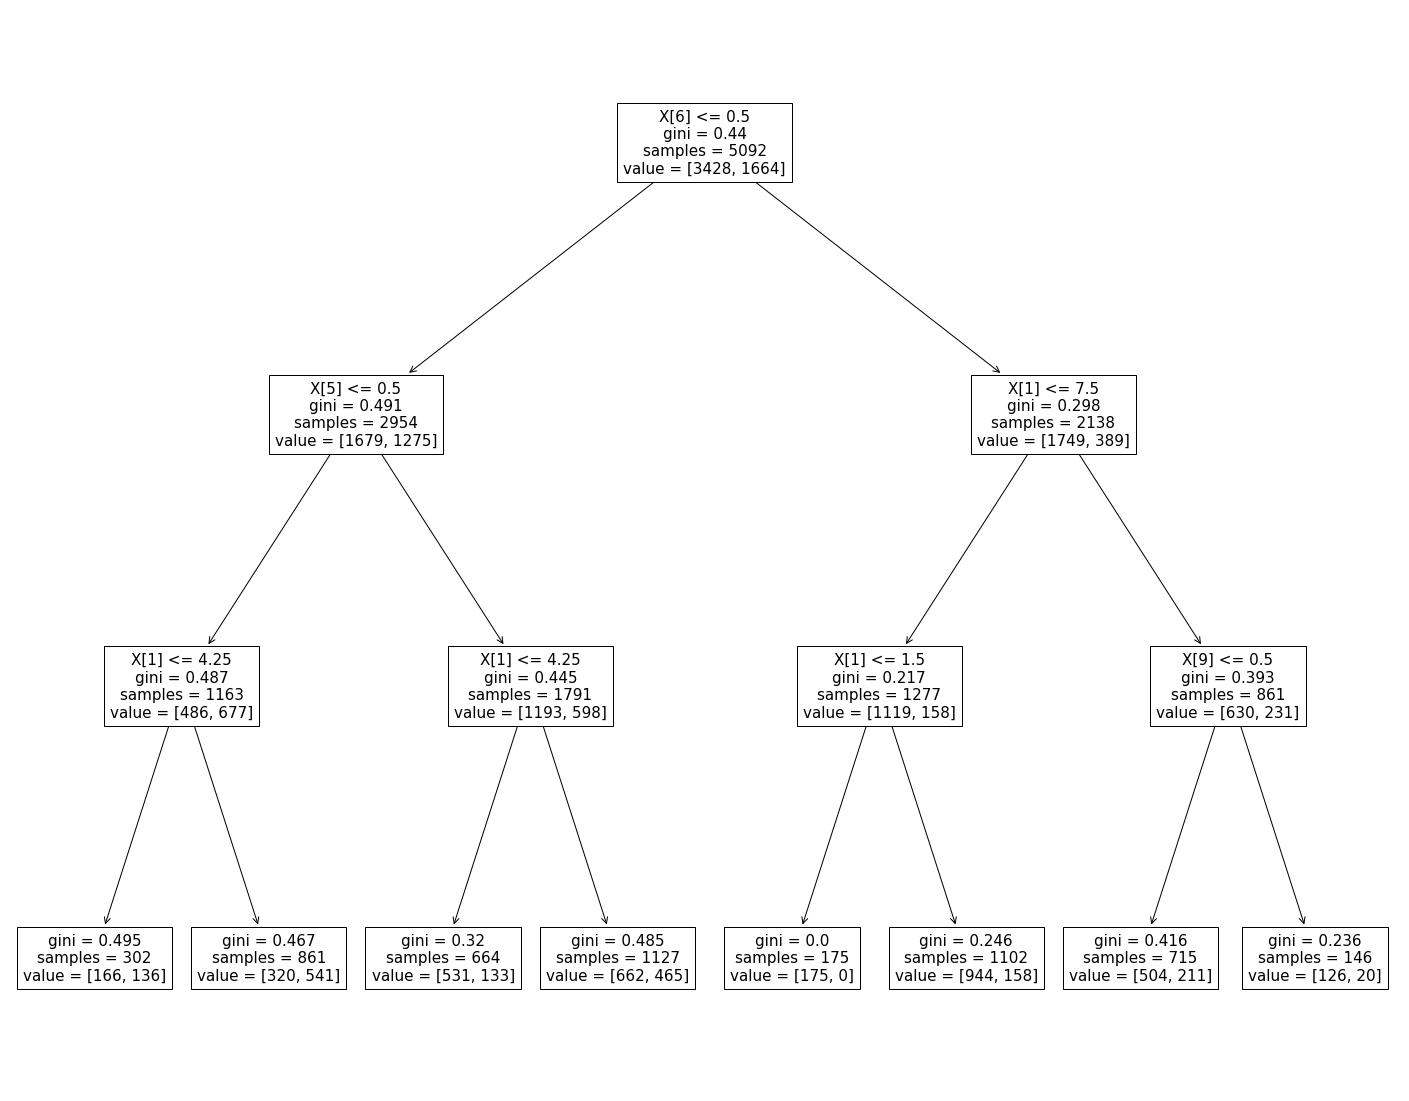

In [27]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model2)

[Text(709.9553571428571, 978.48, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(398.57142857142856, 761.0400000000001, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(199.28571428571428, 543.6, 'X[1] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(99.64285714285714, 326.1600000000001, 'X[1] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(49.82142857142857, 108.72000000000003, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(149.46428571428572, 108.72000000000003, 'gini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(298.92857142857144, 326.1600000000001, 'X[9] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(249.10714285714283, 108.72000000000003, 'gini = 0.459\nsamples = 790\nvalue = [282, 508]'),
 Text(348.75, 108.72000000000003, 'gini = 0.498\nsamples = 71\nvalue = [38, 33]'),
 Text(597.8571428571429, 543.6, 'X[1] <= 4.25\ngini = 0.445\nsamples = 1791\nvalue = [1193, 598]

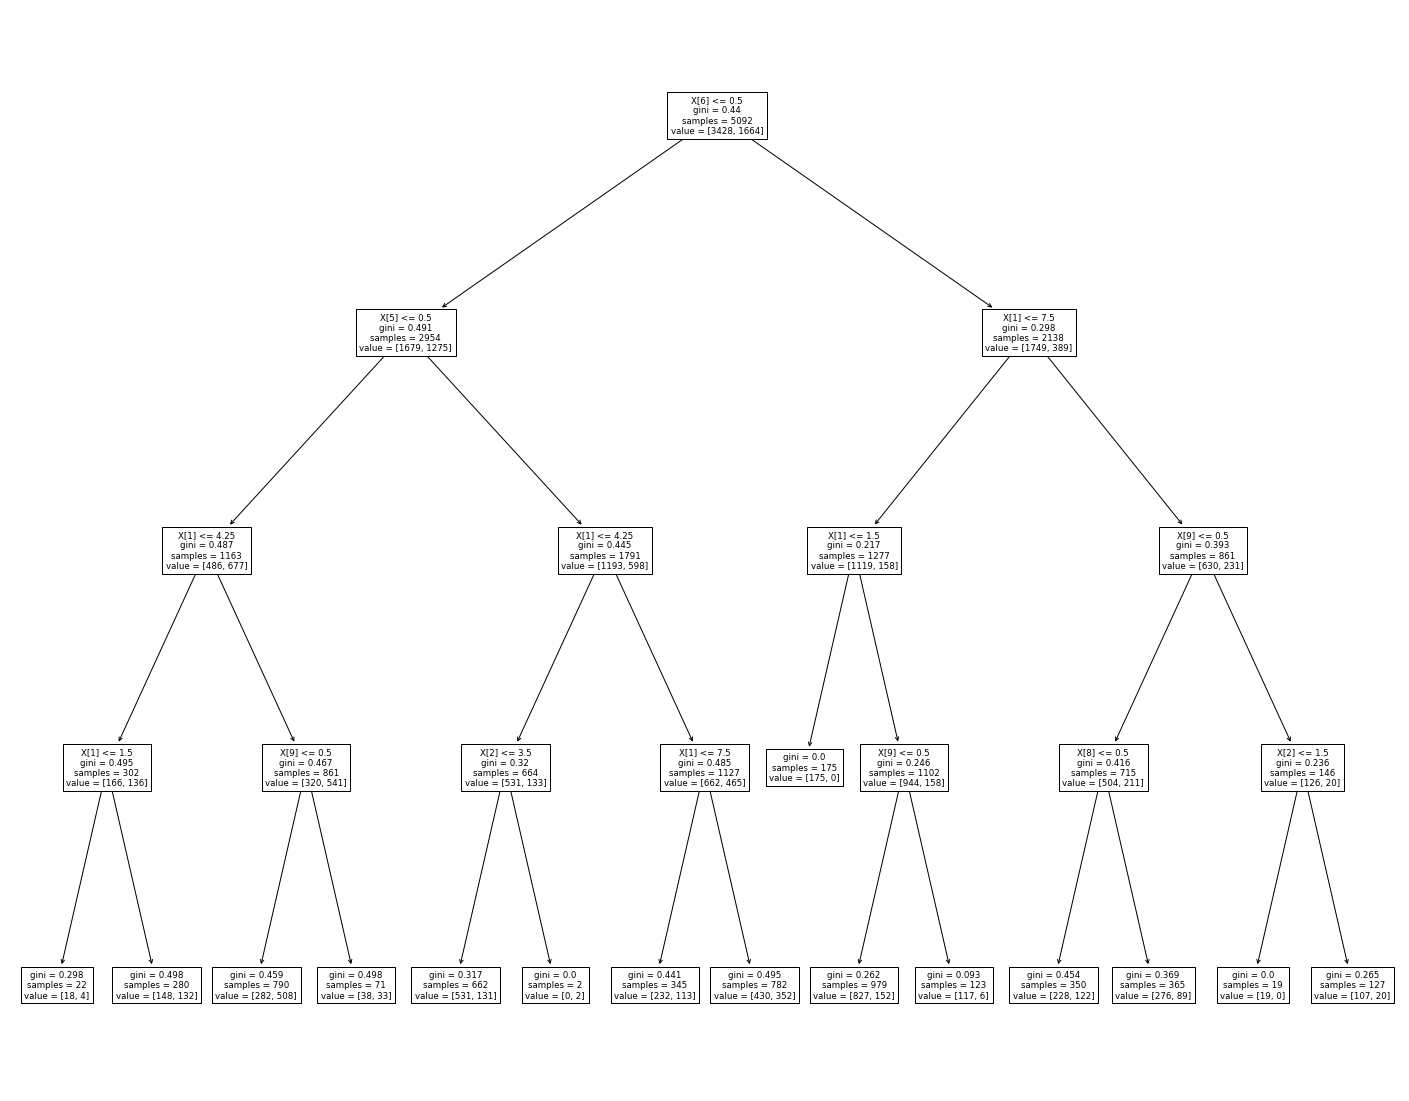

In [28]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model3)

Building a Random Forest Classifier With 100 Trees:

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       885
           1       0.55      0.38      0.45       389

    accuracy                           0.72      1274
   macro avg       0.65      0.62      0.63      1274
weighted avg       0.70      0.72      0.70      1274

Accuracy: 0.7150706436420722
Confusion Matrix: [[764 121]
 [242 147]]


Compared to the individual Decision Trees, the Random Forest does not make a large difference in terms of accuracy. In fact, it has a worse accuracy score when compared to every Decision Tree model except the one with default parameters. Additionally, the number of False Negative and False Positive cases is rather large when compared to the other Decision Tree Models. With a Random Forest, the hope is that combining the forecast of individual "weak" trees will create a strong conclusion. However, this is just a "hope", and as we can see here, this did not happen.  

### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [30]:
# The other categorical variables that we need to include are educ, occupation, and occupation_husb. 
# These already have dummy variables made above. All 3 features have 5 columns in their dummy variables. 

edu.columns = ['edu1', 'edu2', 'edu3', 'edu4', 'edu5']
occ.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5']
husb_occ.columns = ['husb_occ1', 'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5']

df2 = pd.concat([df, edu, occ, husb_occ], axis=1)
df2.columns

Index(['age', 'yrs_married', 'children', 'had_affair', 'rate1', 'rate2',
       'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 'edu3', 'edu4',
       'edu5', 'occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'husb_occ1',
       'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5'],
      dtype='object')

***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

In [31]:
X = df2[['age', 'yrs_married', 'children', 'rate1', 'rate2', 'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2',
        'edu3', 'edu4', 'edu5', 'occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'husb_occ1', 'husb_occ2', 'husb_occ3',
        'husb_occ4', 'husb_occ5']].values

Y = df2['had_affair'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       885
           1       0.44      0.39      0.41       389

    accuracy                           0.66      1274
   macro avg       0.59      0.58      0.59      1274
weighted avg       0.65      0.66      0.65      1274

Accuracy: 0.6593406593406593
Confusion Matrix: [[687 198]
 [236 153]]


Adding the rest of the categorical features into the model seems to have made the accuracy significantly worse than the Decision Tree Classifier with no parameters in part B. The accuracy went from 0.7135007849293563 to 0.6593406593406593, and the f1-score went from 0.81 to 0.76 (in the 0 case) and 0.42 to 0.41 (in the 1 case). The number of False Positive cases rose from 108 to 198. Essentially, including too many features makes the model worse and too complex, leading to overfitting of the data.